<a href="https://colab.research.google.com/github/vindhya1103/Sales-Forecasting-using-ARIMA/blob/main/SalesEDAUsingSARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

plt.style.use('bmh')

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
train['Month']=train['Date'].dt.month
train['Year']=train['Date'].dt.year
train['Dayofweek']=train['Date'].dt.dayofweek

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
0,1,1,2010-02-05,24924.50,False,2,2010,4
1,1,1,2010-02-12,46039.49,True,2,2010,4
2,1,1,2010-02-19,41595.55,False,2,2010,4
3,1,1,2010-02-26,19403.54,False,2,2010,4
4,1,1,2010-03-05,21827.90,False,3,2010,4


In [ ]:
test['Month']=train['Date'].dt.month
test['Year']=train['Date'].dt.year
test['Dayofweek']=train['Date'].dt.dayofweek

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Month,Year,Dayofweek
0,1,1,2012-11-02,False,2,2010,4
1,1,1,2012-11-09,False,2,2010,4
2,1,1,2012-11-16,False,2,2010,4
3,1,1,2012-11-23,True,2,2010,4
4,1,1,2012-11-30,False,3,2010,4


In [ ]:
train.set_index('Date',inplace=True)
test.set_index('Date',inplace=True)

In [ ]:
sales=train.groupby('Date')['Weekly_Sales'].sum()
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Weekly_Sales')

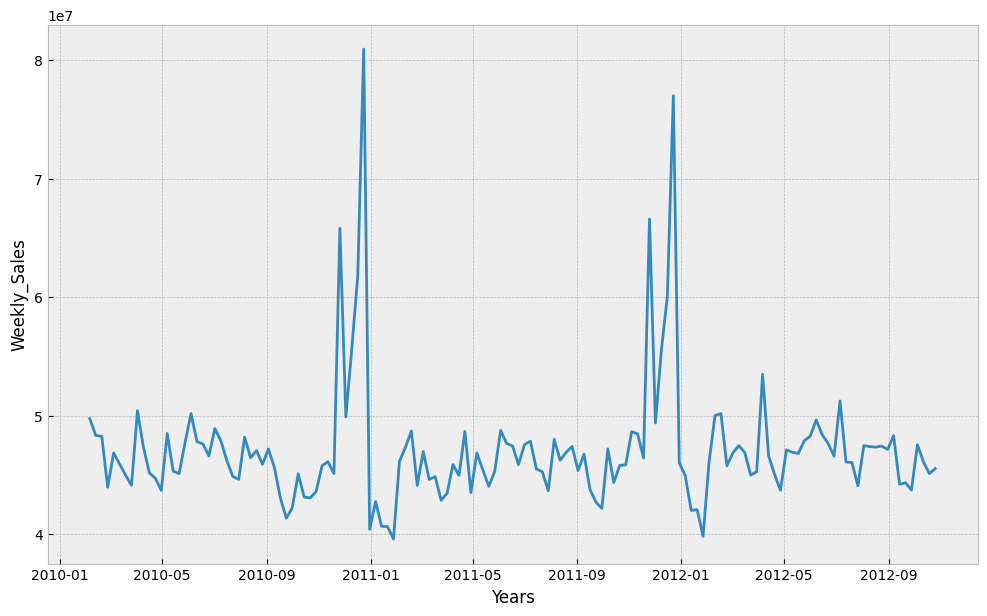

In [ ]:

plt.figure(figsize=(12,7))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')


In [ ]:
mean_sales=sales.rolling(window=12).mean().round(4)
std_sales=sales.rolling(window=12).std().round(4)
print(mean_sales,std_sales)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    4.614606e+07
2012-10-05    4.626830e+07
2012-10-12    4.627405e+07
2012-10-19    4.635949e+07
2012-10-26    4.619767e+07
Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.630511e+06
2012-10-05    1.680931e+06
2012-10-12    1.680270e+06
2012-10-19    1.582753e+06
2012-10-26    1.556161e+06
Name: Weekly_Sales, Length: 143, dtype: float64


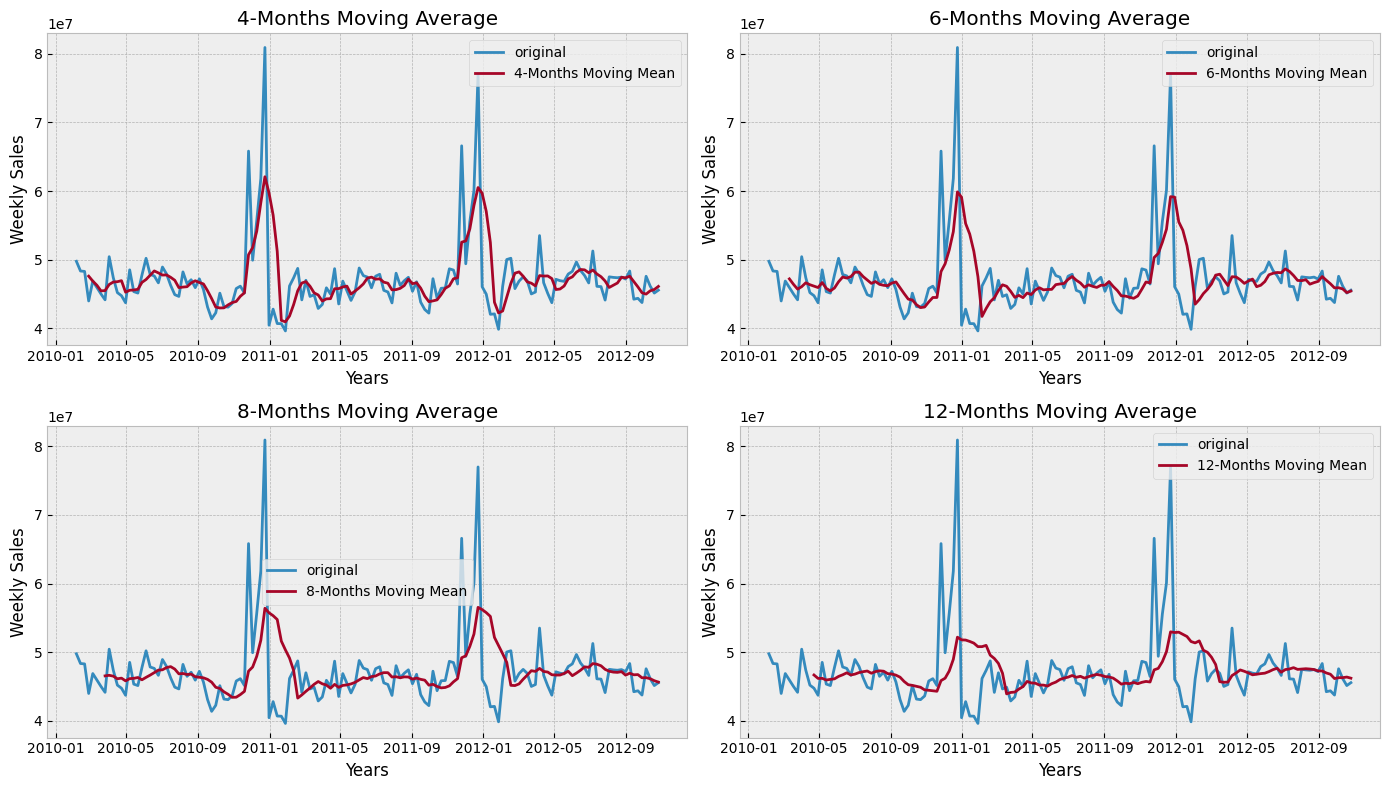

In [ ]:
fig, axes=plt.subplots(2,2)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales.index, sales, label='original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Moving Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Moving Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Moving Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Moving Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Month,Year,Dayofweek
Date,,,,,,,
2010-02-05,1,1,24924.50,False,2,2010,4
2010-02-12,1,1,46039.49,True,2,2010,4
2010-02-19,1,1,41595.55,False,2,2010,4
2010-02-26,1,1,19403.54,False,2,2010,4
2010-03-05,1,1,21827.90,False,3,2010,4


In [ ]:
monthly_sales = pd.pivot_table(train, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales = monthly_sales.reindex(index = [1,2,3,4,5,6,7,8,9,10,11,12])
monthly_sales

Year,2010,2011,2012
Month,,,
1,NaN,13997.773991,14252.698030
2,16076.778701,15870.141203,16077.647710
3,15432.626612,15182.972005,15589.875454
4,15745.551340,15361.895495,15890.394983
5,15996.481695,15367.864481,15967.389566
6,16486.250953,16188.124643,16309.247563
7,15972.812718,15724.738313,15893.325343
8,16171.689295,16030.542478,16002.348874
9,15120.086691,14961.570247,15239.205709


<Axes: xlabel='Month'>

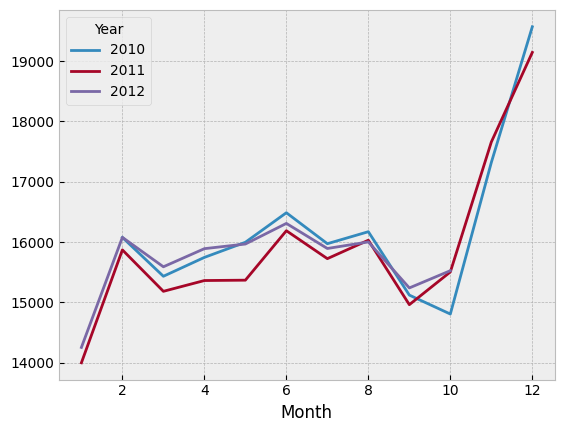

In [ ]:
monthly_sales.plot()

In [ ]:
decomposition=sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)

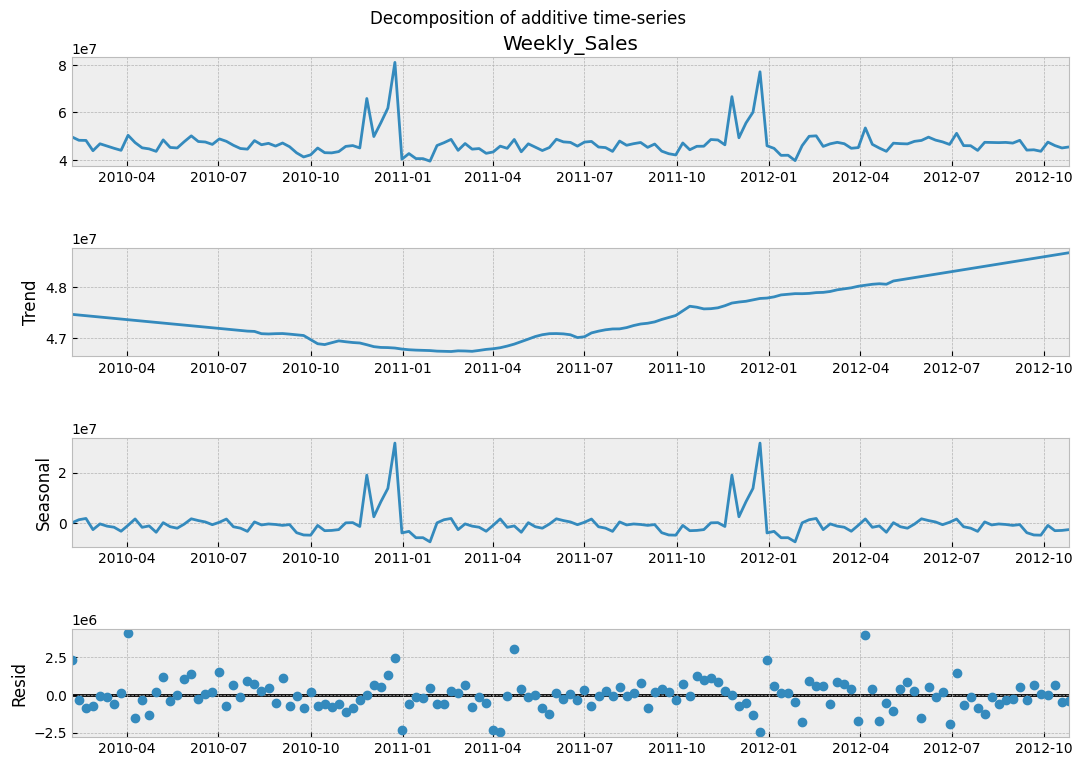

In [ ]:

fig=decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time-series')
plt.show()


In [ ]:
dec_output=pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid],axis=1))

In [ ]:
dec_output.columns=['observed', 'Trend', 'Seasonal', 'Irregular']

In [ ]:
dec_output['TSI']=dec_output.Trend*dec_output.Seasonal*dec_output.Irregular

In [ ]:
dec_output

,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
2010-02-05,49750740.50,4.746247e+07,2.717348e+02,2.288001e+06,2.950882e+16
2010-02-12,48336677.63,4.744942e+07,1.234856e+06,-3.475975e+05,-2.036685e+19
2010-02-19,48276993.78,4.743637e+07,1.737900e+06,-8.972774e+05,-7.397127e+19
2010-02-26,43968571.13,4.742332e+07,-2.705045e+06,-7.497064e+05,9.617400e+19
2010-03-05,46871470.30,4.741027e+07,-4.231219e+05,-1.156816e+05,2.320610e+18
...,...,...,...,...,...
2012-09-28,43734899.40,4.857360e+07,-4.910067e+06,7.136779e+04,-1.702119e+19
2012-10-05,47566639.31,4.859558e+07,-1.016989e+06,-1.195188e+04,5.906763e+17
2012-10-12,46128514.25,4.861756e+07,-3.124785e+06,6.357362e+05,-9.658067e+19


In [ ]:
train=train.groupby('Date')[['Weekly_Sales']].sum()

In [ ]:
train['ds']=train.index

In [ ]:
train.head()

,Weekly_Sales,ds
Date,,
2010-02-05,49750740.50,2010-02-05
2010-02-12,48336677.63,2010-02-12
2010-02-19,48276993.78,2010-02-19
2010-02-26,43968571.13,2010-02-26
2010-03-05,46871470.30,2010-03-05


In [ ]:
train=train[['ds','Weekly_Sales']].rename(columns={'ds':'ds','Weekly_Sales': 'y'})

In [ ]:
import io, os, sys, setuptools, tokenize

In [ ]:
!pip install prophet
import prophet

In [ ]:
from prophet import Prophet
sales_model=Prophet(seasonality_mode='additive',interval_width=0.95)
sales_model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpom_fx6ey/lipbcvbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpom_fx6ey/def6x6dv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89617', 'data', 'file=/tmp/tmpom_fx6ey/lipbcvbn.json', 'init=/tmp/tmpom_fx6ey/def6x6dv.json', 'output', 'file=/tmp/tmpom_fx6ey/prophet_model_0n42dqg/prophet_model-20230628062603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_sales=sales_model.make_future_dataframe(periods=36, freq='MS')
forecast_sales=sales_model.predict(forecast_sales)

In [ ]:
forecast_sales

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.713527e+07,4.107491e+07,5.420986e+07,4.713527e+07,4.713527e+07,7.064522e+05,7.064522e+05,7.064522e+05,7.064522e+05,7.064522e+05,7.064522e+05,0.0,0.0,0.0,4.784172e+07
1,2010-02-12,4.713230e+07,4.195530e+07,5.563293e+07,4.713230e+07,4.713230e+07,1.412412e+06,1.412412e+06,1.412412e+06,1.412412e+06,1.412412e+06,1.412412e+06,0.0,0.0,0.0,4.854471e+07
2,2010-02-19,4.712932e+07,4.031264e+07,5.440832e+07,4.712932e+07,4.712932e+07,3.240224e+04,3.240224e+04,3.240224e+04,3.240224e+04,3.240224e+04,3.240224e+04,0.0,0.0,0.0,4.716173e+07
3,2010-02-26,4.712635e+07,3.885859e+07,5.255036e+07,4.712635e+07,4.712635e+07,-1.180079e+06,-1.180079e+06,-1.180079e+06,-1.180079e+06,-1.180079e+06,-1.180079e+06,0.0,0.0,0.0,4.594628e+07
4,2010-03-05,4.712338e+07,3.932260e+07,5.313963e+07,4.712338e+07,4.712338e+07,-1.452820e+06,-1.452820e+06,-1.452820e+06,-1.452820e+06,-1.452820e+06,-1.452820e+06,0.0,0.0,0.0,4.567056e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2015-06-01,4.999133e+07,4.314300e+07,5.660469e+07,4.923697e+07,5.070744e+07,2.141341e+05,2.141341e+05,2.141341e+05,2.141341e+05,2.141341e+05,2.141341e+05,0.0,0.0,0.0,5.020546e+07
175,2015-07-01,5.004745e+07,4.379559e+07,5.738569e+07,4.925653e+07,5.079093e+07,5.059585e+05,5.059585e+05,5.059585e+05,5.059585e+05,5.059585e+05,5.059585e+05,0.0,0.0,0.0,5.055341e+07
176,2015-08-01,5.010543e+07,4.143927e+07,5.548108e+07,4.927691e+07,5.087390e+07,-1.429012e+06,-1.429012e+06,-1.429012e+06,-1.429012e+06,-1.429012e+06,-1.429012e+06,0.0,0.0,0.0,4.867642e+07
177,2015-09-01,5.016342e+07,4.335971e+07,5.680336e+07,4.930661e+07,5.096765e+07,-2.278637e+04,-2.278637e+04,-2.278637e+04,-2.278637e+04,-2.278637e+04,-2.278637e+04,0.0,0.0,0.0,5.014064e+07


Text(0.5, 1.0, 'Weekly_Sales')

<Figure size 1800x600 with 0 Axes>

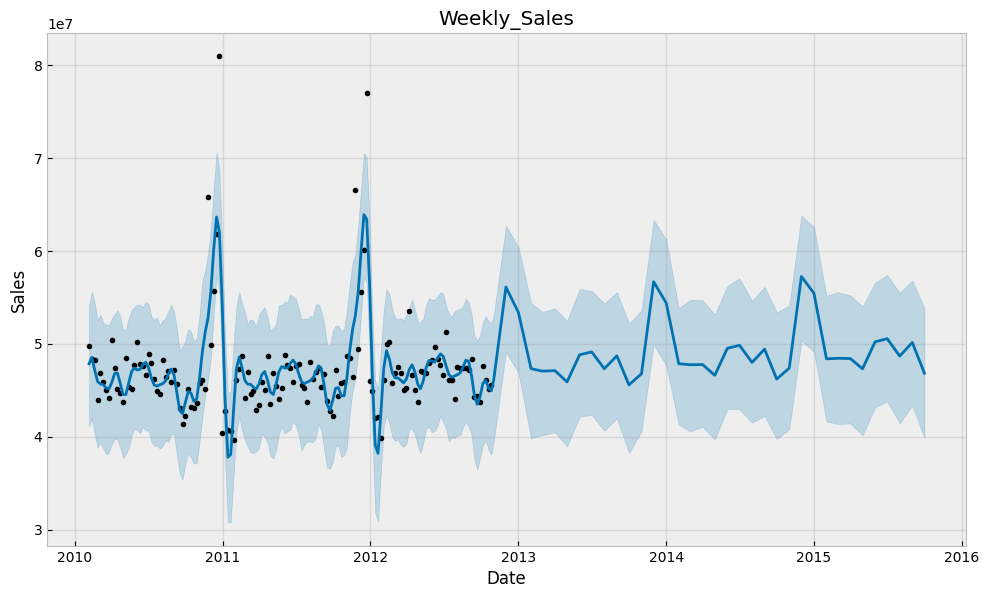

In [ ]:
plt.figure(figsize=(18,6))
sales_model.plot(forecast_sales, xlabel='Date', ylabel='Sales')
plt.title('Weekly_Sales')

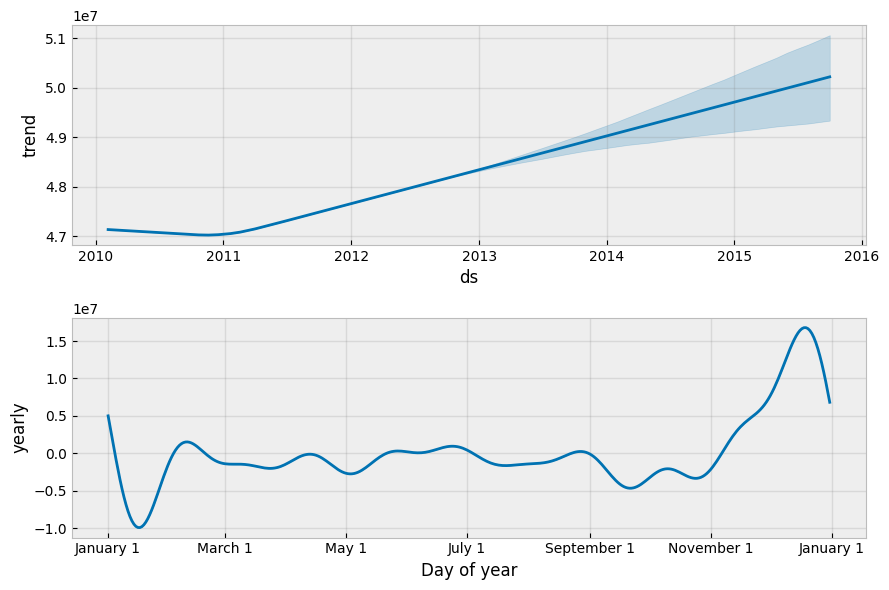

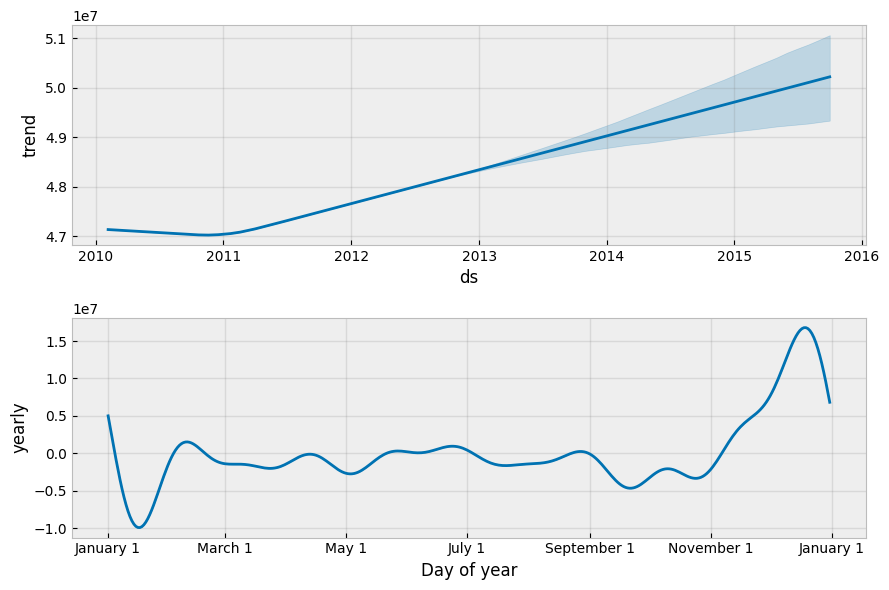

In [ ]:
sales_model.plot_components(forecast_sales)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)

(-5.908297957186334,
 2.675979158986027e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test:
ADF Test Statistic            -5.908298e+00
p-value                        2.675979e-07
Lags Used                      4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


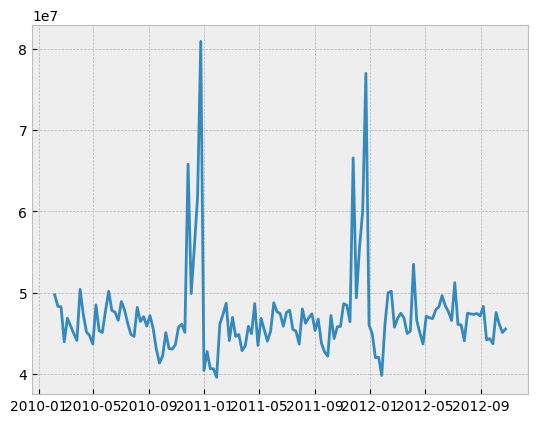

In [ ]:
plt.plot(sales)

In [ ]:
sales_log=np.log10(sales)

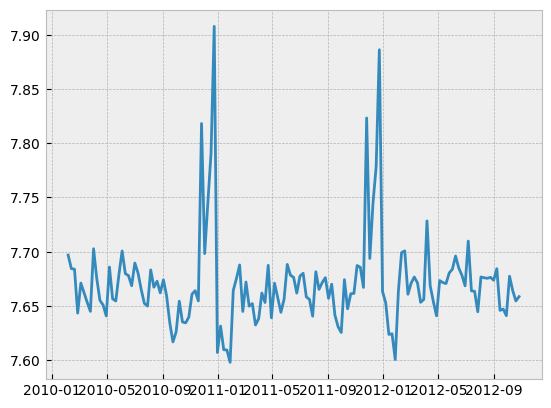

In [ ]:
plt.plot(sales_log)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test:
ADF Test Statistic            -6.332826e+00
p-value                        2.878283e-08
Lags Used                      4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [ ]:
sales.diff(1).head()

Date
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17
Name: Weekly_Sales, dtype: float64

In [ ]:
sales_diff1=sales.diff(1)
sales_diff1.dropna(inplace=True)

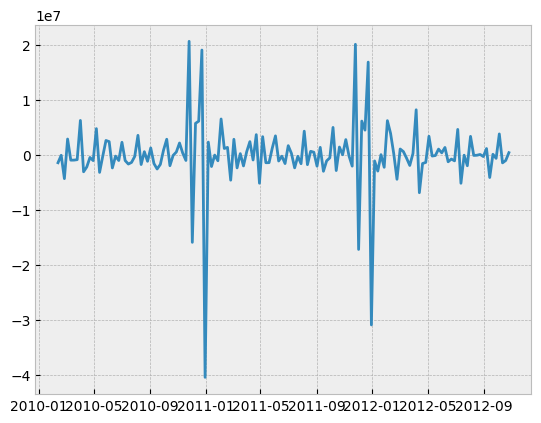

In [ ]:
plt.plot(sales_diff1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test:
ADF Test Statistic            -6.699469e+00
p-value                        3.922579e-09
Lags Used                      7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [ ]:
sales_log_diff1=sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)

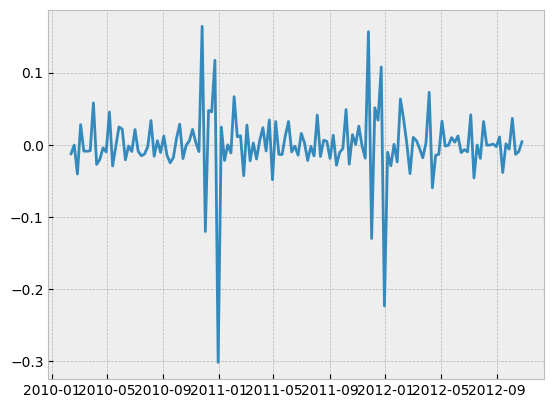

In [ ]:
plt.plot(sales_log_diff1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test:
ADF Test Statistic            -6.747059e+00
p-value                        3.016343e-09
Lags Used                      7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [ ]:
sales_log_diff2=sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test:
ADF Test Statistic            -7.558182e+00
p-value                        3.059679e-11
Lags Used                      4.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


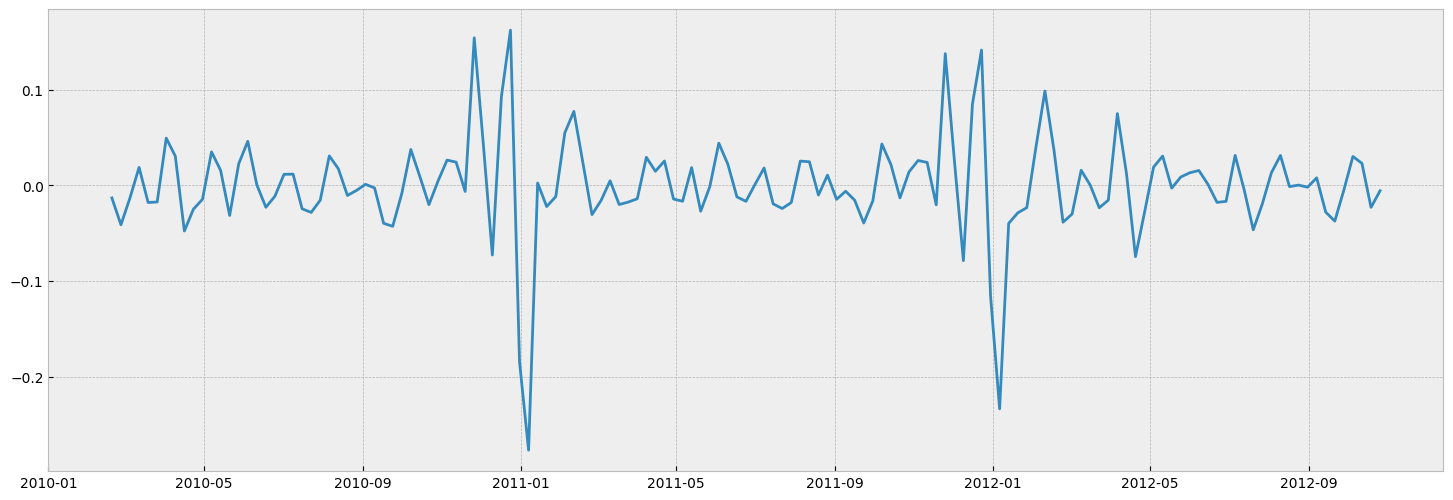

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(sales_log_diff2)

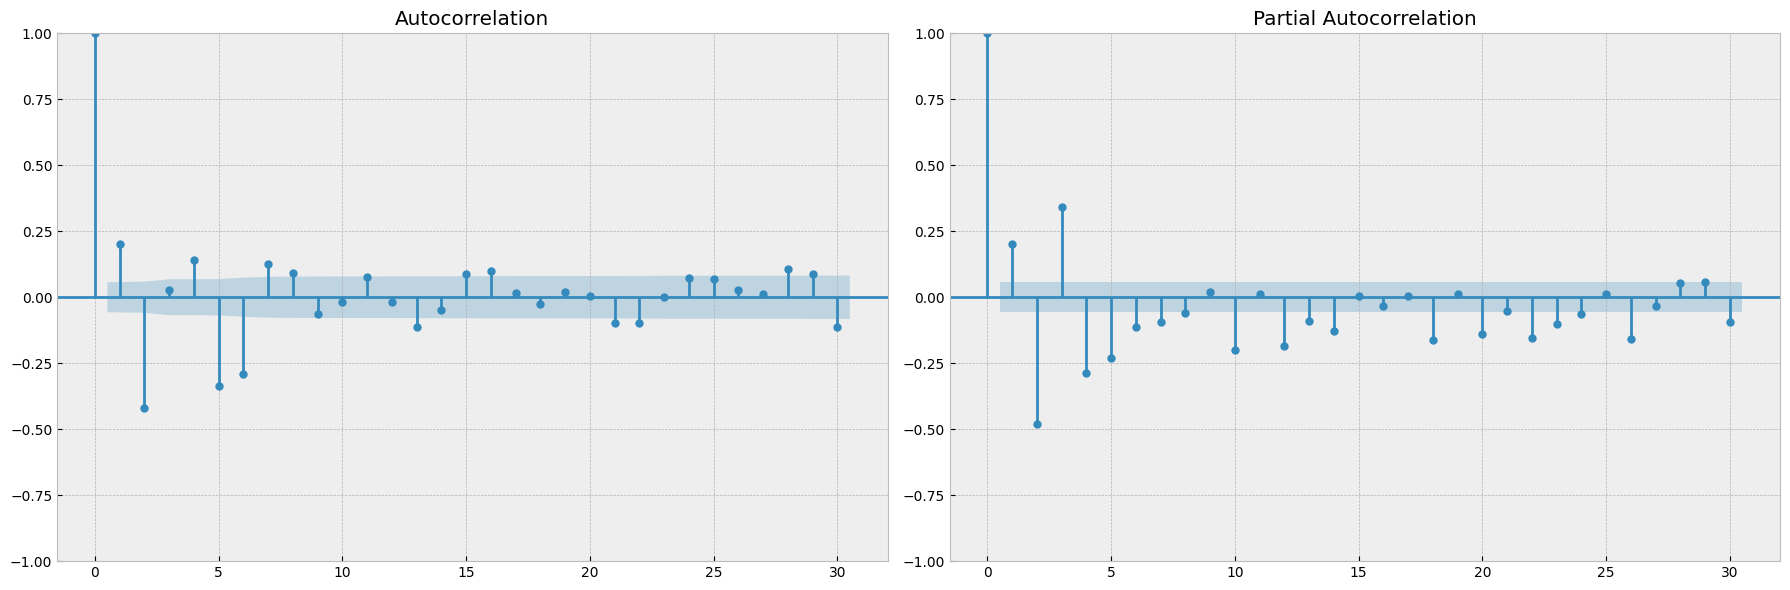

In [ ]:
fig, axes=plt.subplots(1,2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()
plt.show()

In [ ]:
model = sm.tsa.statespace.SARIMAX(sales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12), enforce_stationarity=False, enforce_invertibility=False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  141
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                 212.406
Date:                             Wed, 28 Jun 2023   AIC                           -416.812
Time:                                     06:26:07   BIC                           -405.404
Sample:                                 02-19-2010   HQIC                          -412.177
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3654      0.063     -5.825      0.000      -0.488      -0.242
ma.L1          1.0000    141.287      0.007      0.994    -275.916     277.916
ar.S.L12      -0.0580      0.176     -0.329      0.742      -0.404       0.288
sigma2         0.0020      0.288      0.007      0.994      -0.563       0.567
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               421.74
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p=q=range(0,2)
d=range(0,2)
pdq=list(itertools.product(p,d,q))

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
D=range(0,2)
P=Q=range(0,2)
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-492.9714026517176


In [ ]:
best_model=sm.tsa.statespace.SARIMAX(sales_log, order=(1,1,1), seasonal_order=(0,0,0,12),enforce_stationarity=False, enforce_invertibility=False)
best_results=best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 249.486
Date:                Wed, 28 Jun 2023   AIC                           -492.971
Time:                        06:26:39   BIC                           -484.146
Sample:                    02-05-2010   HQIC                          -489.385
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3754      0.048      7.742      0.000       0.280       0.470
ma.L1         -1.0000     44.151     -0.023      0.982     -87.535      85.535
sigma2         0.0016      0.071      0.023      0.9

In [ ]:
sales

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
pred_dynamic=best_results.get_prediction(start=pd.to_datetime('2012-09-14'),full_results=True)

In [ ]:
pred_dynamic.predicted_mean

2012-09-14    7.676189
2012-09-21    7.661498
2012-09-28    7.661865
2012-10-05    7.659419
2012-10-12    7.673239
2012-10-19    7.668168
2012-10-26    7.664475
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [ ]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [ ]:
actual=sales['2012-09-14':]
actual

Date
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, dtype: float64

In [ ]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [ ]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0378


In [ ]:
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 3507671867809.8804
The ROOT Mean Squared Error of our forecasts is 1872877.9639394234


In [ ]:
np.power(10, best_results.forecast(steps=12))

2012-11-02    4.633928e+07
2012-11-09    4.664133e+07
2012-11-16    4.675521e+07
2012-11-23    4.679803e+07
2012-11-30    4.681411e+07
2012-12-07    4.682015e+07
2012-12-14    4.682242e+07
2012-12-21    4.682327e+07
2012-12-28    4.682359e+07
2013-01-04    4.682371e+07
2013-01-11    4.682376e+07
2013-01-18    4.682377e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [ ]:
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
pred_ci_99.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587074,7.744824
2012-11-09,7.584329,7.753213
2012-11-16,7.584561,7.755099
2012-11-23,7.584816,7.755640
2012-11-30,7.584935,7.755819


In [ ]:
pred_ci_95.head()

,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587074,7.744824
2012-11-09,7.584329,7.753213
2012-11-16,7.584561,7.755099
2012-11-23,7.584816,7.755640
2012-11-30,7.584935,7.755819


In [ ]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [ ]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2012-11-01,4.633928e+07,3.864332e+07,5.556792e+07
2012-12-01,4.664133e+07,3.839978e+07,5.665171e+07
2013-01-01,4.675521e+07,3.842030e+07,5.689830e+07
2013-02-01,4.679803e+07,3.844284e+07,5.696914e+07
2013-03-01,4.681411e+07,3.845338e+07,5.699268e+07


In [ ]:
fc_99.head()

,lower_ci_99,upper_ci_99
2012-11-01,3.864332e+07,5.556792e+07
2012-12-01,3.839978e+07,5.665171e+07
2013-01-01,3.842030e+07,5.689830e+07
2013-02-01,3.844284e+07,5.696914e+07
2013-03-01,3.845338e+07,5.699268e+07


In [ ]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,4.633928e+07,3.864332e+07,5.556792e+07,3.864332e+07,5.556792e+07
2012-12-01,4.664133e+07,3.839978e+07,5.665171e+07,3.839978e+07,5.665171e+07
2013-01-01,4.675521e+07,3.842030e+07,5.689830e+07,3.842030e+07,5.689830e+07
2013-02-01,4.679803e+07,3.844284e+07,5.696914e+07,3.844284e+07,5.696914e+07
2013-03-01,4.681411e+07,3.845338e+07,5.699268e+07,3.845338e+07,5.699268e+07


In [ ]:
pd.plotting.register_matplotlib_converters()

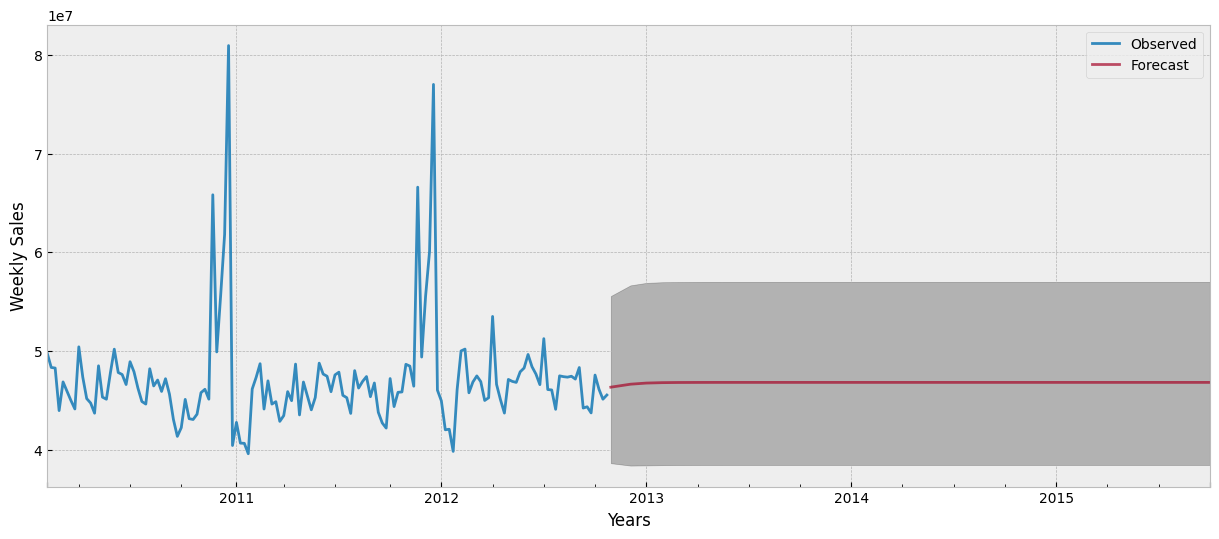

In [ ]:
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

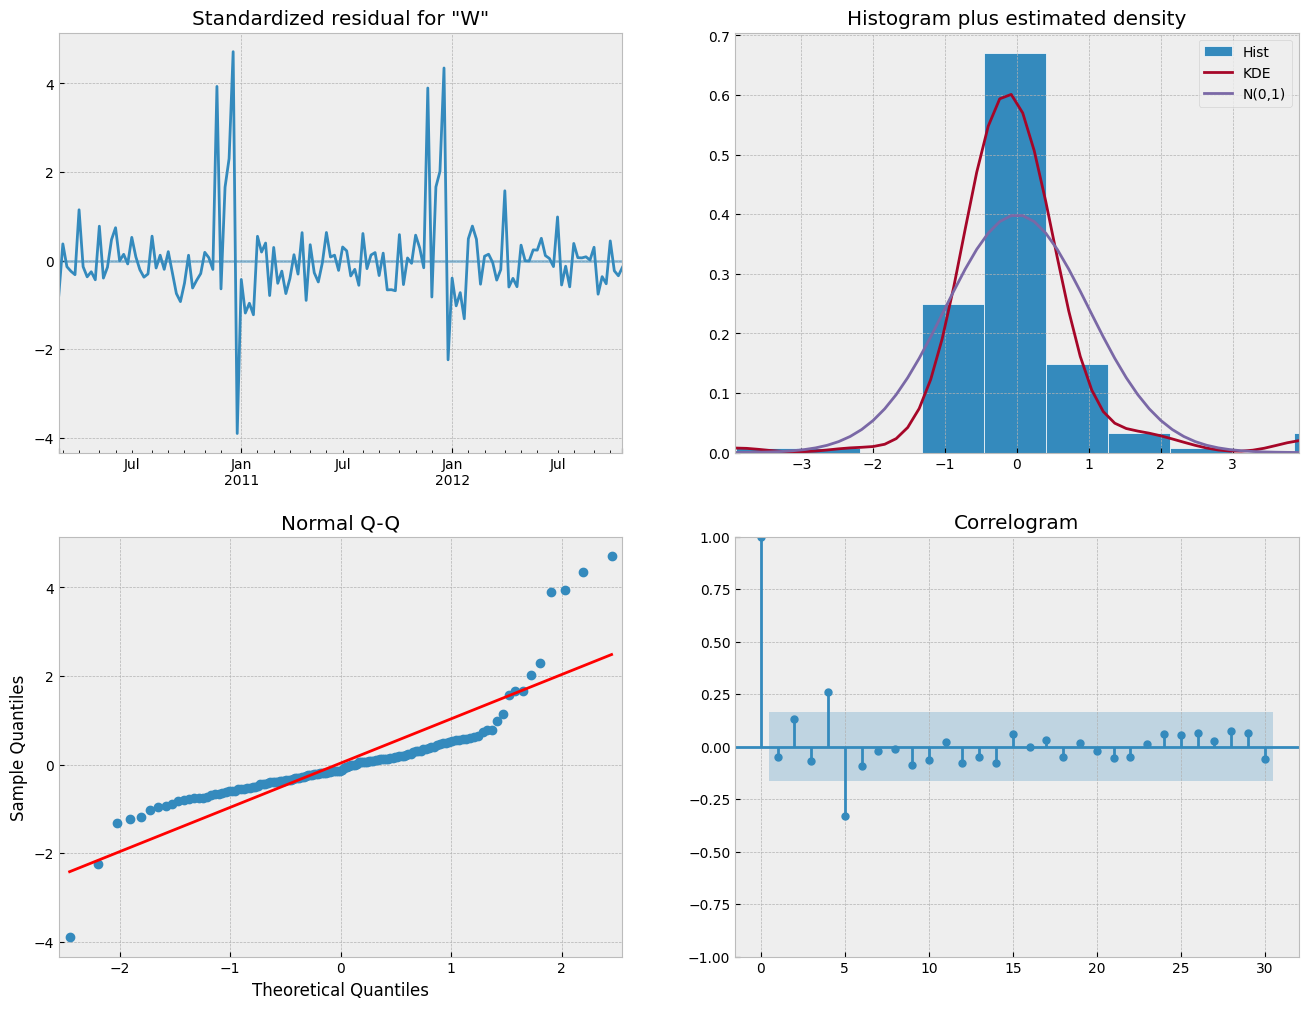

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
#ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
ets_fit = ets_model.fit(optimized=True)

In [ ]:
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

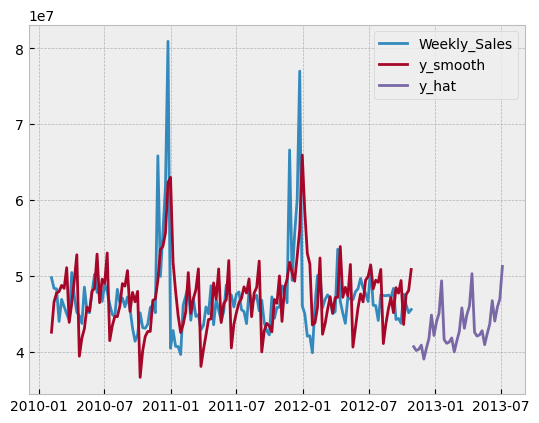

In [ ]:
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')
plt.legend()
plt.show()